In [37]:
import tuw_nlp
tuw_nlp.download_alto()
tuw_nlp.download_definitions()

In [38]:
from tuw_nlp.grammar.text_to_4lang import TextTo4lang
from tuw_nlp.graph.utils import graph_to_pn

## 1. General usage

### Initialize TextTo4lang

The parameters are `language`, `nlp_cache`, `cache_dir`

In [39]:
tfl = TextTo4lang("en", "en_nlp_cache")

2021-11-29 16:52:43 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-11-29 16:52:43 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |
| depparse  | ewt     |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |
| depparse  | ewt     |

2021-11-29 16:52:43 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-11-29 16:52:43 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-11-29 16:52:43 INFO: Loading: pos
INFO:stanza:Loading: pos
2021-11-29 16:52:43 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2021-11-29 16:52:43 INFO: Loading: depparse
INFO:stanza:Loading: depparse
2021-11-29 16:52:44 INFO: Done loading processors!
INFO:stanza:Done loading processors!


### Parsing a sentence

`TextTo4lang` can be called with a context manager, it only has 1 required parameter, the `text` itself:

In [40]:
fl_graphs = list(tfl("Yellow hat"))

### Displaying the graph

The `FourLang` can be converted to a dot format, which can be visualized with the graphviz package

In [41]:
from tuw_nlp.graph.fourlang import FourLang
from graphviz import Source

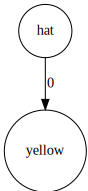

In [42]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [43]:
tfl.lexicon.get_definition("brown")

'A colour like that of chocolate or coffee.'

## 2. Expanding and Reducing a sentence

`TextTo4lang` has two optional parameters, `depth`, which indicates the recursion depth when expanding the graph, and `substitute`, which can be used to reduce the vocabulary of the graph by substituting the _expanded_ node with the root of its definition graph.

The default value for `depth` is 0, and `substitute` is set to _False_ by default.

In [44]:
fl_graphs = list(tfl("brown dog", depth=1, expand_set={"brown"}, substitute=False))

In [45]:
fl_graphs[0].nodes(data=True)

NodeDataView({2: {'name': 'dog'}, 3: {'name': 'brown', 'expanded': True}, 4: {'name': 'colour'}, 5: {'name': 'like'}, 6: {'name': 'that'}, 7: {'name': 'of'}, 8: {'name': 'COORD'}, 9: {'name': 'coffee'}, 10: {'name': 'chocolate'}})

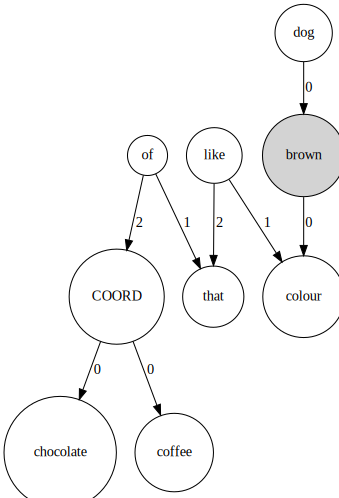

In [46]:
Source(FourLang(fl_graphs[0], None).to_dot())

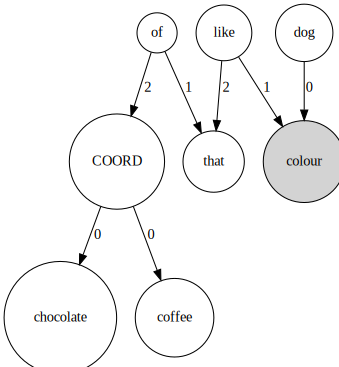

In [47]:
fl_graphs = list(tfl("brown dog", depth=1, expand_set={"brown"}, substitute=True))
Source(FourLang(fl_graphs[0], None).to_dot())

## 3. Using another language

Currently, besides English, TextTo4lang can be used with German as well

In [14]:
tfl = TextTo4lang("de", "de_nlp_cache")

2021-11-29 16:46:14 INFO: Loading these models for language: de (German):
| Processor  | Package |
------------------------
| tokenize   | gsd     |
| fix_ssplit | default |

INFO:stanza:Loading these models for language: de (German):
| Processor  | Package |
------------------------
| tokenize   | gsd     |
| fix_ssplit | default |

2021-11-29 16:46:14 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2021-11-29 16:46:14 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2021-11-29 16:46:14 INFO: Loading: fix_ssplit
INFO:stanza:Loading: fix_ssplit
2021-11-29 16:46:14 INFO: Done loading processors!
INFO:stanza:Done loading processors!
2021-11-29 16:46:14 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

INFO:stanza:Loading these models for language: de (German):
| Processor | Package |
-----------------------
| t

In [15]:
fl_graphs = list(tfl("brauner Hund", depth=1, substitute=False))

Processing tmp/20211129_164621_583708/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(braun)),NOUN(Hund)))          ] 58 ms
2 [dummy(dummy)                                      ] 802 μs
Done, total time: 86 ms
Processing tmp/20211129_164622_169142/input.txt (2 instances) ...
1 [ROOT(NOUN(_ACL(NOUN(_PUNCT(PUNCT(COMMA)),NOUN(_DET] 78 ms
2 [dummy(dummy)                                      ] 642 μs
Done, total time: 101 ms
Processing tmp/20211129_164623_642872/input.txt (2 instances) ...
1 [ROOT(NOUN(_AMOD(ADJ(erdig)),NOUN(_CONJ(NOUN(_PUNCT] 111 ms
2 [dummy(dummy)                                      ] 693 μs
Done, total time: 169 ms


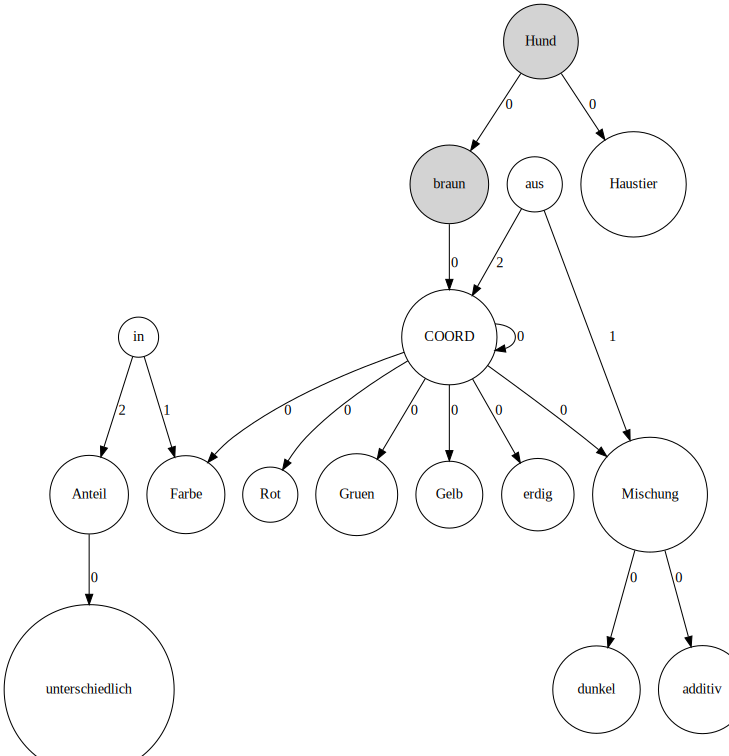

In [16]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [17]:
tfl.lexicon.get_definition("braun")

'erdige Farbe, additiv dunkle Mischungen aus Gelb, Rot und Grün in unterschiedlichen Anteilen'